## Incorporating critiques on my plot:
Christine suggested 
- Refuse collection per person in each borough might be interesting.
- Including some conjecture about why Staten Island has the most refuse could improve your caption, since it is pretty surprising that Staten Island is first in refuse collection.
- Plotting refuse collection over a longer time period could be interesting as well, if data are available.
- This is my personal preference, but I would resize your x and y labels to be smaller than your title.

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('%s/DSNY_Monthly_Tonnage_Data.csv' %os.getenv('PUIDATA'))
df.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1
2,2017 / 08,Queens,8,3805.1,461.0,412.8,NaN,NaN,NaN,NaN,4
3,2017 / 08,Brooklyn,18,5907.8,584.1,599.3,NaN,NaN,NaN,NaN,3
4,2017 / 08,Queens,5,4827.9,597.6,758.9,185.3,NaN,NaN,NaN,4


In [4]:
df['date'] = pd.to_datetime(df.MONTH)
df = df[df['date'] < '2018-09-01']

In [5]:
mn = df[df['BOROUGH'] == 'Manhattan']
bk = df[df['BOROUGH'] == 'Brooklyn']
si = df[df['BOROUGH'] == 'Staten Island']
qn = df[df['BOROUGH'] == 'Queens']
bx = df[df['BOROUGH'] == 'Bronx']

In [6]:
mn.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID,date
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1,2017-08-01
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1,2017-08-01
19,2017 / 10,Manhattan,4,2423.1,431.9,356.8,NaN,NaN,NaN,NaN,1,2017-10-01
21,2017 / 10,Manhattan,11,2245.2,197.3,175.2,NaN,NaN,NaN,NaN,1,2017-10-01
24,2017 / 10,Manhattan,6,2944.2,511.1,377.8,19.2,NaN,NaN,NaN,1,2017-10-01


Text(0.5,1,'Refuse Collected From Each Borough\nFrom Aug. 2017 to Aug. 2018')

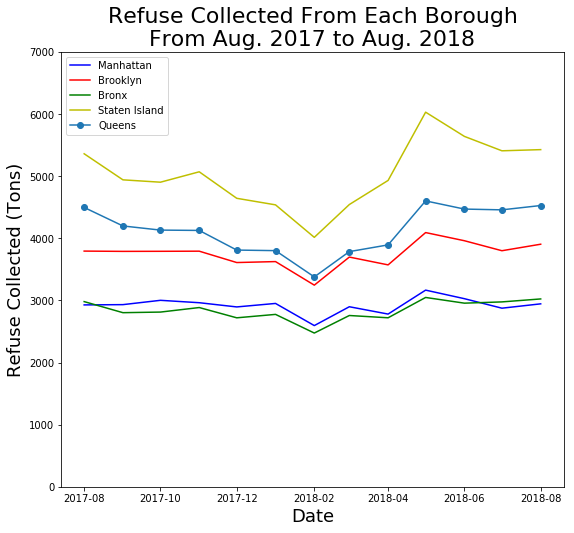

In [7]:
plt.figure(figsize=(9,8))
plt.plot(mn.groupby(['date'])['REFUSETONSCOLLECTED'].mean(), '-b')
plt.ylim(0,7000)
plt.plot(bk.groupby(['date'])['REFUSETONSCOLLECTED'].mean(), '-r')
plt.plot(bx.groupby(['date'])['REFUSETONSCOLLECTED'].mean(), '-g')
plt.plot(si.groupby(['date'])['REFUSETONSCOLLECTED'].mean(), '-y')
plt.plot(qn.groupby(['date'])['REFUSETONSCOLLECTED'].mean(), '-o')
plt.legend(['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Refuse Collected (Tons)', fontsize=18)
plt.title('Refuse Collected From Each Borough\nFrom Aug. 2017 to Aug. 2018', fontsize=22)

## Figure 1:
This figure plots Refuse Collected by the Department of Sanitation against the Date of collection, which ranges from August 2017 to August 2018. Despite having the smallest population, Staten Island has the most refuse collected. One reason may be that the borough contains the Fresh Kills Landfill. This figure also illustrates the possible seasonality of the data, where refuse collection is at its nadir in the winter and peak in early summer/late spring.